# Random Forest Analysis for Inventory Dashboard Data

This notebook analyzes the Daily Inventory Dashboard data using Random Forest to provide insights.

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the data
file_path = "/home/alaskapycoder/DataScience/Daily_Inventory_Dashboard.xlsx"
df = pd.read_excel(file_path)

# Display basic information
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1700, 21)


,ProductNumber,Description,Planner,Active_Demand,TotalOnHand,Safety_Stock,Stock_Buffer,ProductionReq,PlannedReq,OnOrder,...,High_Value_Flag,Stock_vs_Demand,Stock_Status,Priority_Rank,Planner_Priority_Rank,ACTION_REQUIRED,BUFFER_PERCENTAGE,STOCK_HEALTH,STOCK_ZONE,DAYS_COVERAGE
0,074112,39 X 5 1/16 1/2IN CLEAR,LTE01,34.0,167.0,200,-33.0,34.0,0.0,200.0,...,LOW PRIORITY,133.0,SUFFICIENT,700,77,RESTOCK NEEDED,-16.5%,REORDER NOW,REORDER NOW,REORDER NOW
1,074112DD,39 X 5 1/16 1/2IN DOUBLE DARK,LTE01,25.0,392.0,200,192.0,11.0,14.0,0.0,...,LOW PRIORITY,367.0,SUFFICIENT,771,38,NORMAL,96%,HEALTHY STOCK,BLUE ZONE,MODERATE - <1 MONTH BUFFER
2,074112SAT,39 X 5 1/16 1/2IN SATIN,LTE01,54.0,246.0,200,46.0,46.0,8.0,0.0,...,LOW PRIORITY,192.0,SUFFICIENT,578,63,NORMAL,23%,LOW - 25% BUFFER,GREEN ZONE,CRITICAL - <1 WEEK BUFFER
3,0741FACEBLACK,0741 FACE FRAME BLACK,LTE01,50.0,848.0,200,648.0,50.0,0.0,0.0,...,LOW PRIORITY,798.0,SUFFICIENT,597,18,NORMAL,324%,HEALTHY STOCK,BLUE ZONE,LOW - <2 WEEK BUFFER
4,0741FACECOFFEE,LANDSCAPE COFFEE FACE FRAME,LTE01,16.0,108.0,100,8.0,2.0,14.0,0.0,...,LOW PRIORITY,92.0,SUFFICIENT,883,91,NORMAL,8%,CRITICAL - 10% BUFFER,YELLOW ZONE,CRITICAL - <1 WEEK BUFFER


In [13]:
# Check data types and missing values
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())


Data Types:
ProductNumber             object
Description               object
Planner                   object
Active_Demand            float64
TotalOnHand              float64
Safety_Stock               int64
Stock_Buffer             float64
ProductionReq            float64
PlannedReq               float64
OnOrder                  float64
Below_Reorder             object
High_Value_Flag           object
Stock_vs_Demand          float64
Stock_Status              object
Priority_Rank              int64
Planner_Priority_Rank      int64
ACTION_REQUIRED           object
BUFFER_PERCENTAGE         object
STOCK_HEALTH              object
STOCK_ZONE                object
DAYS_COVERAGE             object
dtype: object

Missing Values:
ProductNumber            0
Description              0
Planner                  0
Active_Demand            0
TotalOnHand              0
Safety_Stock             0
Stock_Buffer             0
ProductionReq            0
PlannedReq               0
OnOrder             

In [14]:
# Exploratory Data Analysis
# Create descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProductNumber,1700,1700,WS18X8TSWB115,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1700,1697,2A826C 22.75INX5000FT FILM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Planner,1700,11,HDW01,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Active_Demand,1700.0,NaN,NaN,NaN,1097.5806,8676.70858,1.0,4.0,19.0,128.0,202041.48
TotalOnHand,1700.0,NaN,NaN,NaN,9218.651729,81927.248036,-3020.03,35.0,135.0,744.25,2514502.08
Safety_Stock,1700.0,NaN,NaN,NaN,3805.391176,30382.53708,0.0,18.0,63.0,325.0,668685.0
Stock_Buffer,1700.0,NaN,NaN,NaN,5413.260553,70989.780184,-114652.56,4.0,36.0,291.0,2513962.08
ProductionReq,1700.0,NaN,NaN,NaN,623.737541,5597.222821,0.0,0.0,3.0,34.0,113347.12
PlannedReq,1700.0,NaN,NaN,NaN,473.843059,3965.002493,-1.0,2.0,10.0,63.25,97483.0
OnOrder,1700.0,NaN,NaN,NaN,5678.285682,100715.952738,0.0,0.0,0.0,0.0,3840000.0


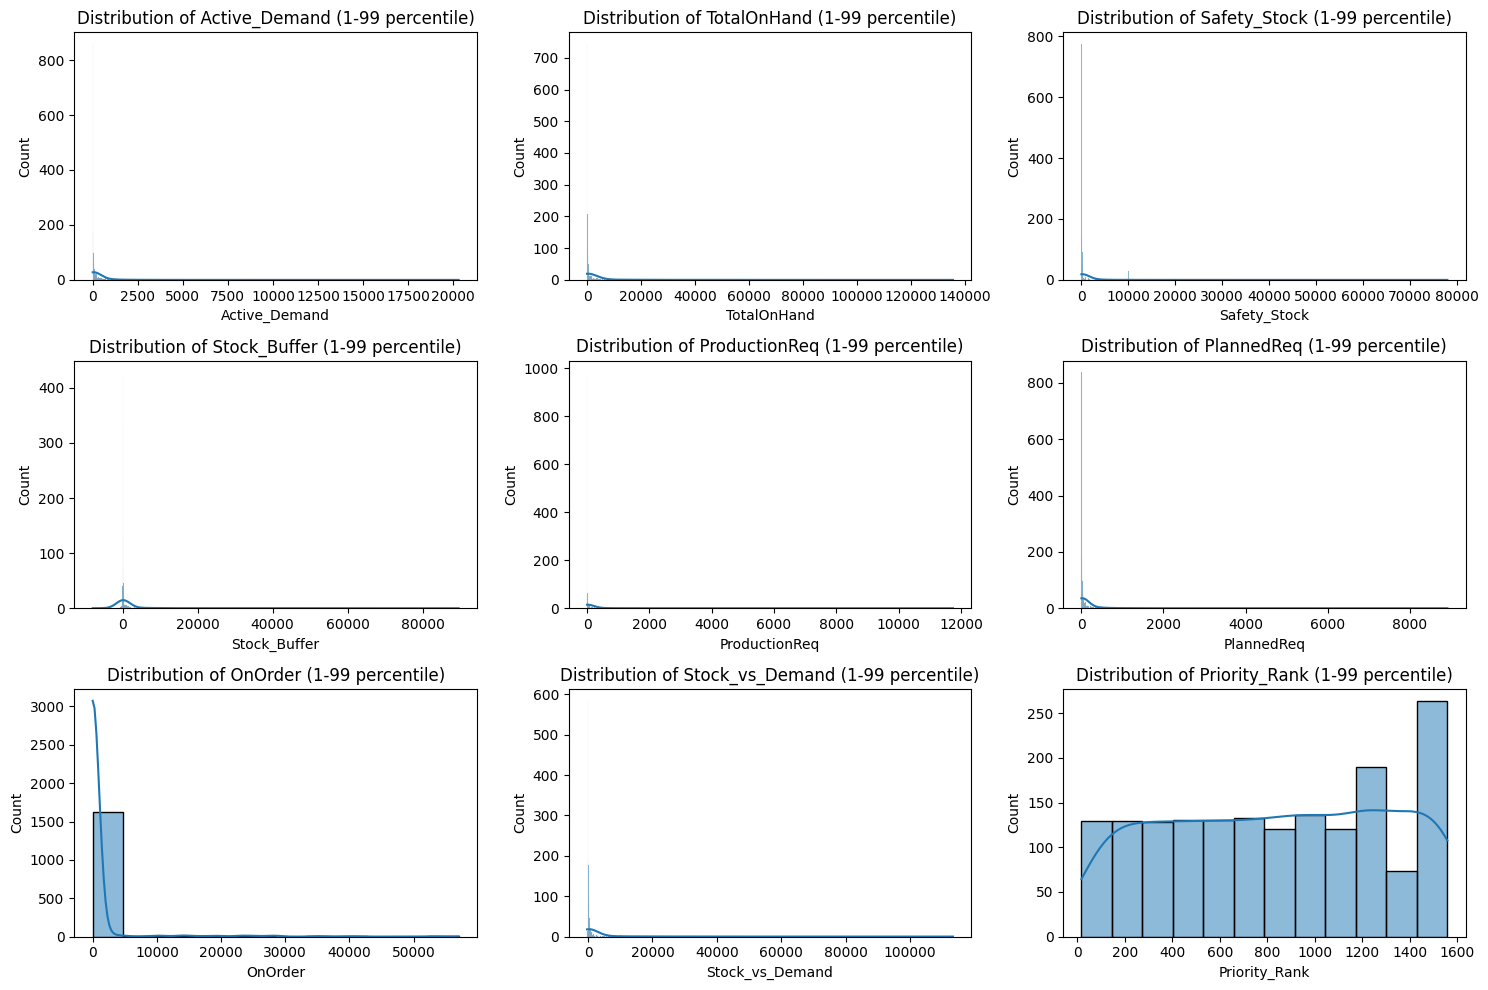

In [17]:
# Test plot to check for massive outliers.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Check for infinite values and replace them
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot each numerical column with better handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:min(9, len(numeric_cols))]):
    plt.subplot(3, 3, i+1)
    
    # Remove NaN values for plotting
    data = df[col].dropna()
    
    # Check if there's data to plot
    if len(data) > 0:
        # Calculate percentiles to handle outliers
        q1, q99 = data.quantile(0.01), data.quantile(0.99)
        # Filter out extreme outliers for better visualization
        filtered_data = data[(data >= q1) & (data <= q99)]
        
        # Plot the data
        if len(filtered_data) > 0:
            sns.histplot(filtered_data, kde=True)
            plt.title(f'Distribution of {col} (1-99 percentile)')
        else:
            plt.text(0.5, 0.5, f"No data to plot after filtering outliers", 
                    horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(0.5, 0.5, f"No data to plot (all NaN)", 
                horizontalalignment='center', verticalalignment='center')
    
plt.tight_layout()
plt.show()

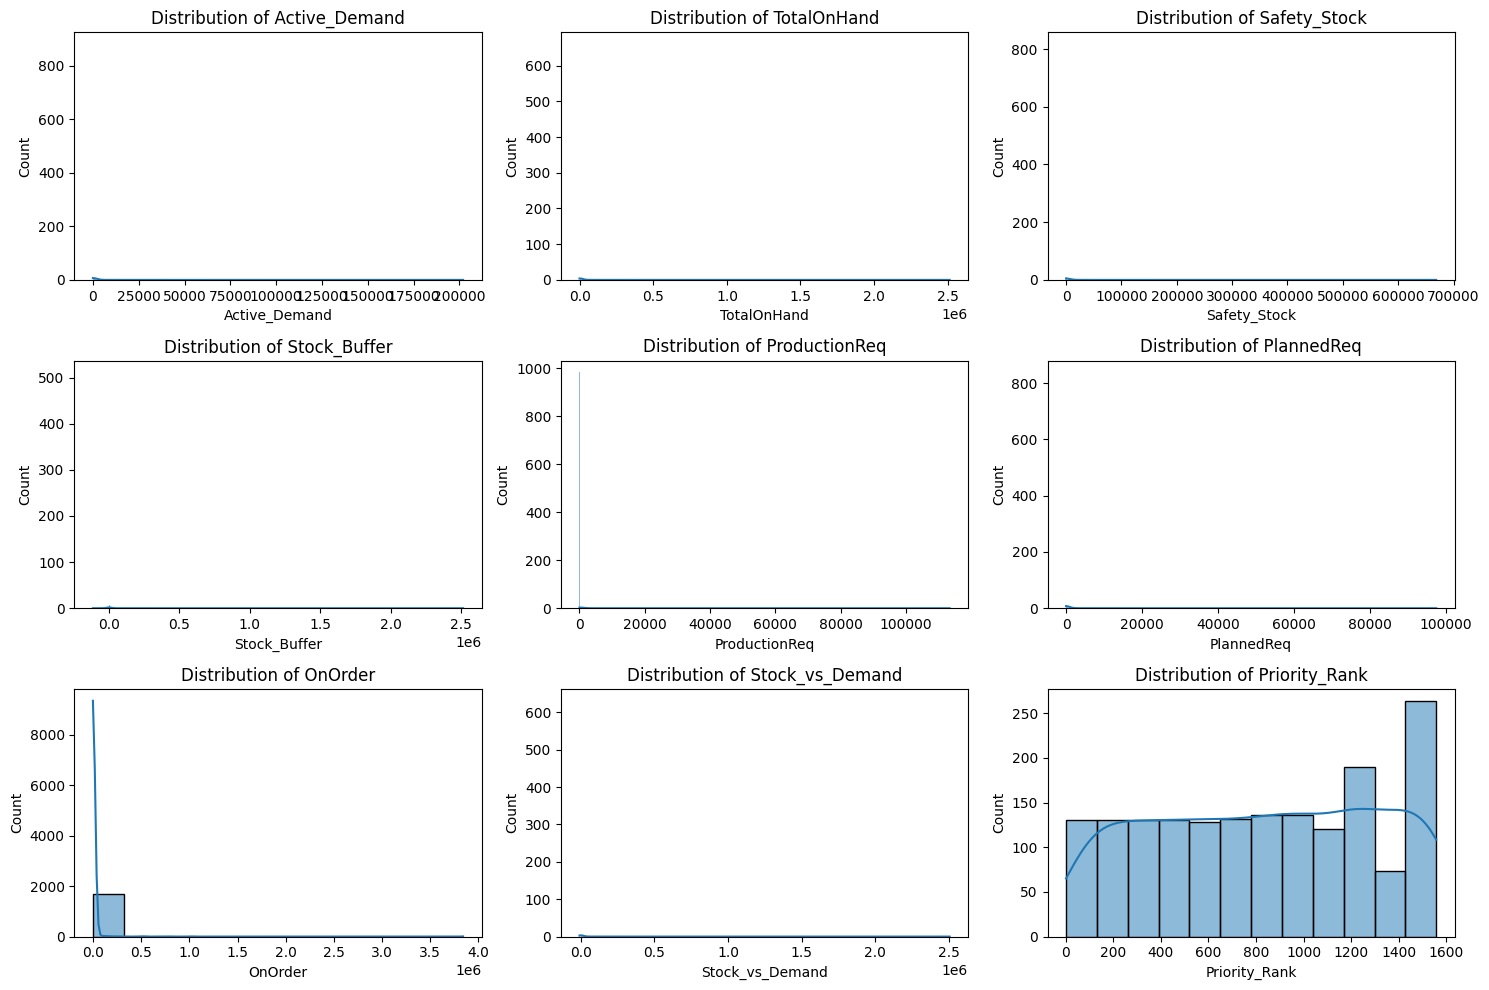

In [15]:
# Visualize distributions of numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(numeric_cols) > 0:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols[:min(9, len(numeric_cols))]):
        plt.subplot(3, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [16]:
# Handle missing values
# 1. Check which columns have missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print(f"Columns with missing values: {missing_cols}")

# 2. For numerical columns with missing values, impute with median
for col in missing_cols:
    if df[col].dtype in ['int64', 'float64']:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in {col} with median: {median_value}")

# 3. Verify missing values are handled
print("\nRemaining missing values:")
print(df.isnull().sum())

Columns with missing values: []

Remaining missing values:
ProductNumber            0
Description              0
Planner                  0
Active_Demand            0
TotalOnHand              0
Safety_Stock             0
Stock_Buffer             0
ProductionReq            0
PlannedReq               0
OnOrder                  0
Below_Reorder            0
High_Value_Flag          0
Stock_vs_Demand          0
Stock_Status             0
Priority_Rank            0
Planner_Priority_Rank    0
ACTION_REQUIRED          0
BUFFER_PERCENTAGE        0
STOCK_HEALTH             0
STOCK_ZONE               0
DAYS_COVERAGE            0
dtype: int64


Random Forest Model Accuracy: 1.0

Classification Report:
                                     precision    recall  f1-score   support

            FULFILL DEMAND SHORTAGE       1.00      1.00      1.00        23
         MONITOR HIGH PRIORITY ITEM       1.00      1.00      1.00        35
                             NORMAL       1.00      1.00      1.00       366
                     RESTOCK NEEDED       1.00      1.00      1.00        80
URGENT - RESTOCK HIGH PRIORITY ITEM       1.00      1.00      1.00         6

                           accuracy                           1.00       510
                          macro avg       1.00      1.00      1.00       510
                       weighted avg       1.00      1.00      1.00       510



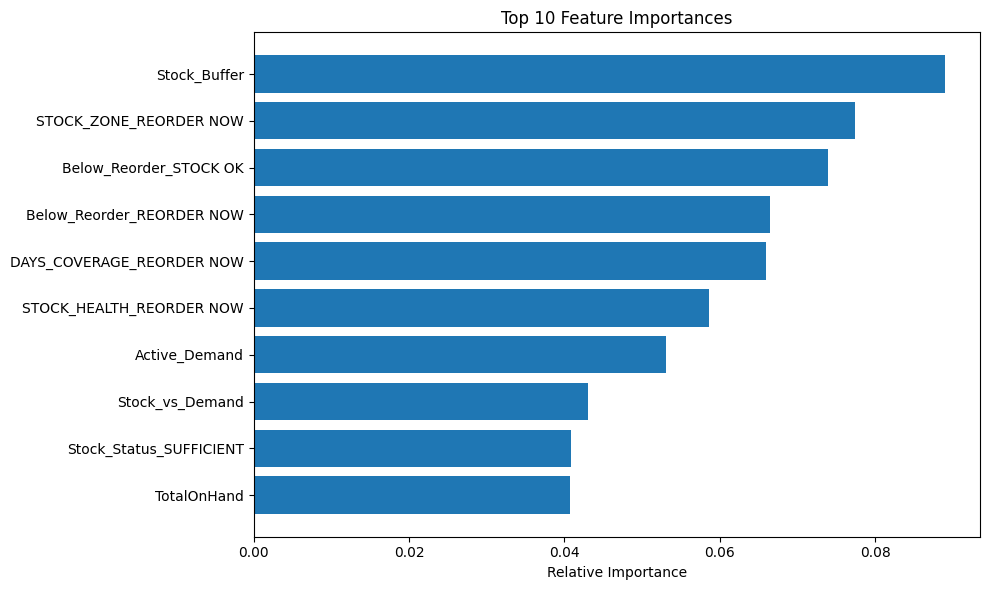

In [18]:
# Handle missing values in Priority_Rank
df['Priority_Rank'].fillna(df['Priority_Rank'].median(), inplace=True)

# Prepare data for Random Forest
# Select features and target
# Let's predict ACTION_REQUIRED as an example target
X = df.drop(['ProductNumber', 'Description', 'ACTION_REQUIRED'], axis=1)
y = df['ACTION_REQUIRED']

# Handle categorical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train Random Forest model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_names = numerical_cols + [f"{col}_{cat}" for col in categorical_cols 
                                for cat in rf_model.named_steps['preprocessor']
                                .transformers_[1][1].categories_[categorical_cols.index(col)]]

importances = rf_model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] if i < len(feature_names) else 'Unknown' for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()
